# Multilayer Neural Network
Description: An implementation of multilayer neural network from scratch.


In [227]:
import numpy as np
from nn_utils import *
import matplotlib.pyplot as plt
%matplotlib inline

In [228]:
class NNLearner(object):
    def __init__(self, learning_rate = .001,\
                   num_iterations = 1000000,\
                   num_neurons = [],\
                   batch_size = 32,\
                   verbose = True):
        '''
        Arguments:
        learning_rate (float): the learning rate for parameter update rules
        num_iterations (int): the number of iteration to perform gradient descent
        num_neuron (list): the number of neurons in each cell including the input layer and 
                           with a default binary output layer e.g., [8,16,4] has 8 neurons in the 
                           input layer, 16 and 4 neurons in the first and second input layer
                           and a single output neuron.
        batch_size (int): the number of examples to train per epoch.  If the number of examples in 
                          the training set is smaller than the batch number, it will use the entire 
                          training set per epoch of training.
        verbose (boolean): for debugging.

        Returns:
        None
        '''
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.num_neurons = num_neurons
        self.num_neurons.append(1) #append 1 here to make number of neuron at output layer be 1.
        self.num_of_layers = len(self.num_neurons)
        self.batch_size = batch_size
        self.verbose = verbose

    def addEvidence(self, dataX, dataY):
        '''
        Arguments:
        dataX (ndarray): training set inputs, ndarray of shape (m x n) where m is number of training 
                         examples and n is number of input features
        dataY (ndarray): trianing set labels, ndarray of shape (m x 1) where m is number of training
                         examples
        Returns:
        None
        '''
        print(self.num_neurons)
        print(self.num_of_layers)
        #transpose the commonly used dataset convention for better vectorization and matrix multiplication
        dataX = dataX.T
        dataY = dataY.T
        num_examples = dataX.shape[1]
        
        #set batch size
        self.batch_size = min(self.batch_size, num_examples)
        
        #weights initialization.  The two list below will hold ith layer weights.  
        self.W = []
        self.b = []
        for i in range(self.num_of_layers):
            if i == 0:
                num_inputs = dataX.shape[0]
            else:
                num_inputs = self.num_neurons[i-1]
            ith_layer_weights = (np.random.random((self.num_neurons[i], num_inputs))-.5)
            ith_layer_bias = np.zeros((self.num_neurons[i], 1))
            #ith_layer_bias = (np.random.random((self.num_neurons[i], 1))-.5) #optional random initialization
            self.W.append(ith_layer_weights)
            self.b.append(ith_layer_bias)
            if self.verbose:
                print(self.W)
                print(self.b)
        

### Test Code

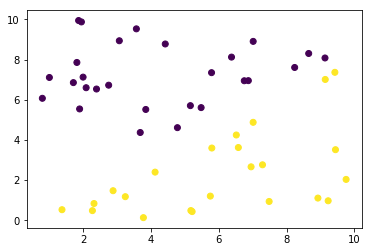

In [229]:
#create test case - dummy dataset 2D linear separable
np.random.seed(101)
data = np.random.random((50,3)) * 10
dataX = data[:,:-1]
dataY = data[:,-1]

#assign ground truth weights
w1 = 3.4
w2 = -4.2
b = 2.5
z = w1 * dataX[:,0] + w2 * dataX[:,1] + b
sig = sigmoid(z)
dataY[sig > .5] = 1
dataY[sig <= .5] = 0

#visualize dummy test case
plt.scatter(dataX[:,0], dataX[:,1], c=dataY)

In [238]:
nnl = NNLearner(num_neurons = [1,2,3])
nnl2 = NNLearner(num_neurons = [5])
nnl3 = NNLearner()
# nnl.addEvidence(dataX, dataY)
print(nnl.num_of_layers)
print(nnl2.num_of_layers)
print(nnl3.num_of_layers)


4
2
6
